# The Josephson effect

## Exercise 1

## 1a)

To solve the differential equation $ \frac{d^2y}{dx^2} = -4\sin(2x)$ we take the laplace transform on both sides, giving  

$$ s^2 \mathcal{L}(y) - sy(0) - y'(0) = \frac{-8}{s^2+4}. $$  

Substituting the initial conditions $y(0) = 0$ and $y'(0) = 2$, we simplify to  

$$ \mathcal{L}(y) = \left( \frac{-8}{s^2+4} + 2 \right) \frac{1}{s^2}. $$  

Simplyfying further

$$ \mathcal{L}(y) = \frac{2}{s^2+4}. $$  

Then taking the inverse Laplace transform on both sides, we get the solution

$$ y(x) = \sin(2x). $$

---

## 1b)

To rewrite the given differential equation $\tfrac{d^2y}{dx^2} = -4\sin(2x)$, we start by calling the equation for $v$ instead of $y$, such that we are now working with $\tfrac{d^2v}{dx^2} = -4\sin(2x)$. Next, we introduce new variables by setting  
$$
y = v,
\quad
y' = \frac{dv}{dx}.
$$  
Doing this, we get the desired vector form
$$
\vec{y}(x) =
\begin{pmatrix}
y(x)\\
y'(x)
\end{pmatrix}.
$$

Such that
$$
\frac{d}{dx}\,\vec{y}(x)
=
\begin{pmatrix}
y'(x)\\
y''(x)
\end{pmatrix}.
$$

$\quad$

Finally, because the original initial conditions from (a) are $y(0)=0$ and $y'(0)=2$, these translate into  
$$
\vec{y}(0) =
\begin{pmatrix}
0 \\
2
\end{pmatrix}.
$$

---

## 1c)

We start by importing neccesary libraries, then we create a class for our solver which is neccesary to do the rest of exercise 1. We implement the solver as its described in the task

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class RK3_2:
    """
    A class implementing a Runge-Kutta method with adaptive step-size control
    for solving ordinary differential equations as a system of first-order ODEs.

    Attributes:
        x_init (float): Starting point of the integration interval.
        x_end (float): Endpoint of the integration interval.
        f (callable): Function defining the ODE, f(x, y) where y is a 2-component array [y, y'].
        h0 (float): Initial step size for the integration.
        xs (np.ndarray): Array of x values after integration (set by integrate).
        ys (np.ndarray): 2D array of solution values [y, y'] after integration (set by integrate).
    """

    def __init__(self, x_init, x_end, f, h0):
        self.x_init = x_init
        self.x_end = x_end
        self.f = f
        self.h0 = h0
        self.xs = None
        self.ys = None

    def integrate(self, tol, alpha, y_init):
        """
        Solve the ODE using the adaptive RK3 method over [x_init, x_end] with given tolerance and alpha.

        Args:
            tol (float): Tolerance for local error estimate.
            alpha (float): Pessimist factor for step-size adjustment.
            y_init (list or np.ndarray): Initial condition as a 2-element array [y(x_init), y'(x_init)].

        Returns:
            tuple: (xs, ys, total_steps, step_lengths), where
                - xs (np.ndarray): Array of x values at each accepted step.
                - ys (np.ndarray): 2D array of shape (n, 2) with solution [y, y'] at each x.
                - total_steps (int): Total number of accepted and discarded steps taken.
                - step_lengths (list): List of step sizes used at each accepted step.
        """
        h = self.h0
        xs = [np.array(self.x_init,dtype = float)]
        ys = [np.array(y_init, dtype=float)]
        step_sizes = []
        total_steps = 0
        k1 = self.f(xs[0], ys[0])

        while xs[-1] < self.x_end:
            h = min(h, self.x_end - xs[-1])
            k2 = self.f(xs[-1] + 0.5*h, ys[-1] + 0.5*h*k1)
            k3 = self.f(xs[-1] + 0.75*h, ys[-1] + 0.75*h*k2)
            y_next = ys[-1] + (h/9)*(2*k1 + 3*k2 + 4*k3)
            x_next = xs[-1] + h
            k4 = self.f(x_next, y_next)
            z_next = ys[-1] + (h/24)*(7*k1 + 6*k2 + 8*k3 + 3*k4)
            est = np.linalg.norm(y_next - z_next)

            if est < tol:
                xs.append(x_next)
                ys.append(y_next)
                step_sizes.append(h)
                k1 = k4

            h_new = alpha * h * (tol / est)**(1/3)
            h = h_new
            total_steps += 1

        self.xs = np.array(xs)
        self.ys = np.array(ys)
        return self.xs, self.ys, total_steps, step_sizes


    def EOC(self, y_analytic):
        """
        Compute the maximum absolute error for y(x)
        compared to an analytical solution.

        Args:
            y_analytic (callable): Function taking x (np.ndarray) and returning the analytical
                                  solution y(x) for comparison.

        Returns:
            float: Maximum absolute difference between the numerical y(x) (self.ys[:, 0])
                   and the analytical solution at self.xs.

        Notes:
            Assumes self.xs and self.ys are set by a prior call to integrate.
        """
        y_analytic_vals = y_analytic(self.xs)
        return np.max(np.abs(self.ys[:, 0] - y_analytic_vals))

Using the solver to do task 1c)

In [3]:
def f(x, Y):
    """
    Evaluate the derivative of the state vector for the ODE system.

    Parameters
    ----------
    x : float
        The independent variable.
    Y : array_like, shape (2,)
        The state vector where Y[0] represents y and Y[1] represents y'.

    Returns
    -------
    np.ndarray
        An array containing the derivatives: [y', -4*sin(2*x)].
    """
    return np.array([Y[1], -4 * np.sin(2 * x)])

solver1 = RK3_2(x_init = 0, x_end =2*np.pi ,f = f, h0 = 0.07)
xs, ys, total_steps, step_lengths = solver1.integrate(1e-7,0.8,[0, 2])


Creating the plots

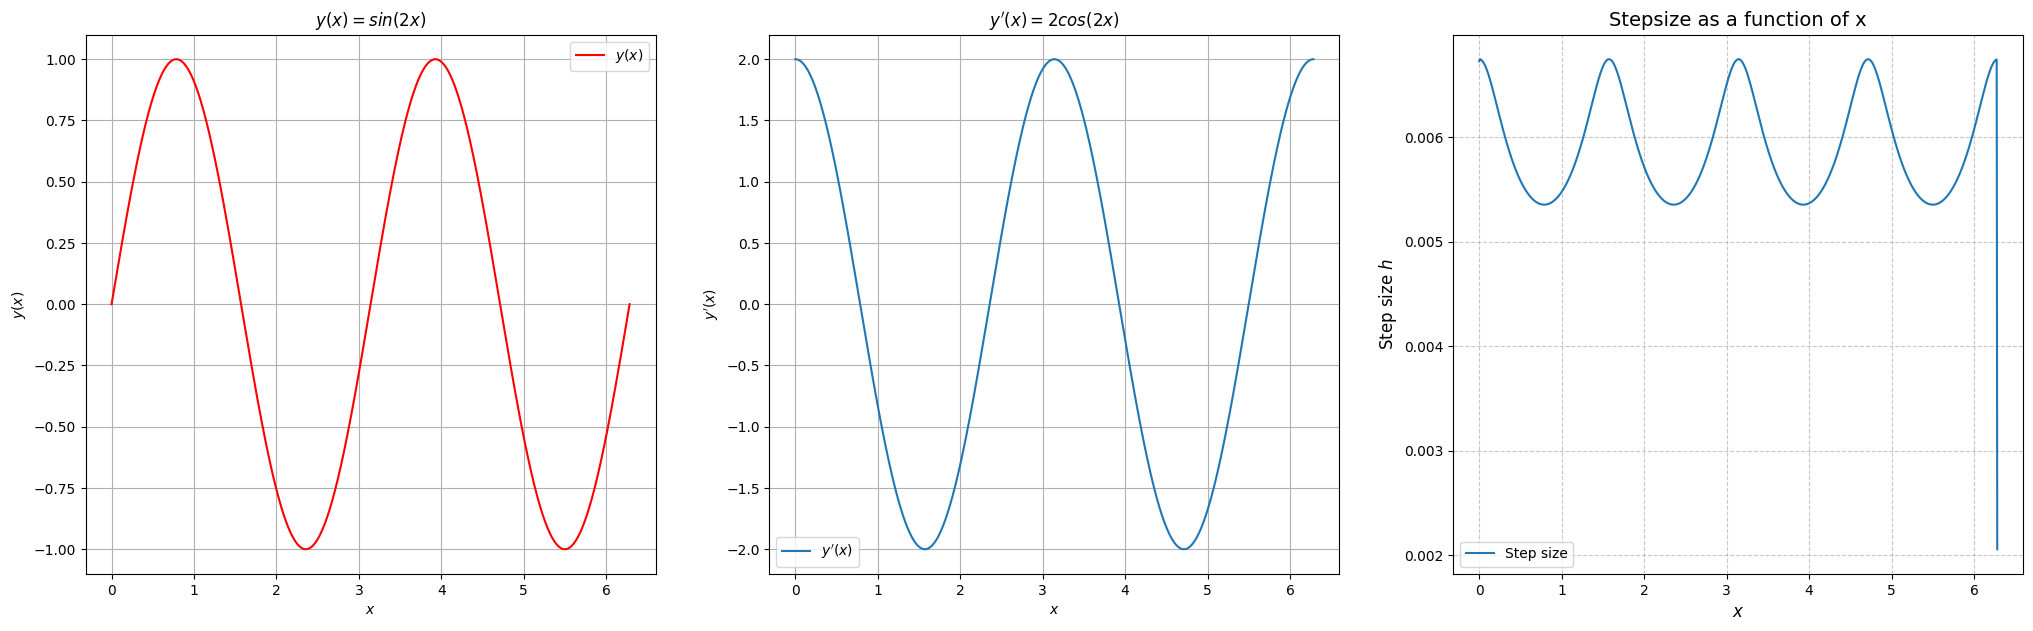

In [4]:
fig,axs = plt.subplots(1,3,figsize = (25,7))

axs[0].plot(xs, ys[:, 0], label='$y(x)$',color = "r")
axs[0].set_xlabel('$x$')
axs[0].set_ylabel('$y(x)$')
axs[0].set_title('$y(x) = sin(2x)$')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(xs,ys[:,1],label = "$y'(x)$")
axs[1].set_xlabel('$x$')
axs[1].set_ylabel("$y'(x)$")
axs[1].set_title("$y'(x) = 2cos(2x)$")
axs[1].grid(True)
axs[1].legend()

axs[2].plot(xs[:-1], step_lengths, label='Step size')
axs[2].set_xlabel('$x$', fontsize=12)
axs[2].set_ylabel('Step size $h$', fontsize=12)
axs[2].set_title('Stepsize as a function of x', fontsize=14)
axs[2].grid(True, linestyle='--', alpha=0.7)
axs[2].legend()


We observe that the solver has created a solution that is accurate for our given differential equation.

As we know the method adjusts the step size *h* dynamically in order to maintain the currently given error tolerance, which we have set to $10^{-7}$.
So the step size depends on the function's behaviour. In regions where the solution $y(x) = \sin(2x)$ is nearly linear, such as between its peaks and troughs for example around $ x \in [1, 2] $—the step size becomes larger. This occurs because the error estimate calculated as the difference between the third-order approximation $ y_{n+1} $ and the second order reference $ z_{n+1} $, remains small in these regions.

Conversely, near the solution’s peaks and troughs, where  $y(x)$ curves the step size shrinks. In these regions there will be a larger difference between the third-order and second-order approximations. The error estimate grows because the rapid changes in the solution, so  to ensure the error stays within our tolerance, $ h $ gets reduced.

Finally, as $x$ approaches $2π$ we can see that the step size decreases sharply. This is not  due to error estimates but it is enforced by the line            ` h = min(h, self.x_end - xs[-1])`, which caps h to ensure the solver lands at $x = 2π$. This  prevents overshooting the interval endpoint.


## 1d)

We start by defining the analytic function

In [5]:
def f_analytic(x):
  return np.sin(2*x)

We consider 30 tolerance values evenly distributed over the interval $[10^{-10}, 10^{-1}]$. For each tolerance, we compute the corresponding error and store the results in a list.

In [6]:
tol_values = np.logspace(-10, -1, 30)
errors_tols = []

for tol in tol_values:
    solver1.integrate(tol,0.8,[0, 2])
    errors = solver1.EOC(f_analytic)
    errors_tols.append((errors))

We consider 20 equally spaced $\alpha$ values over the interval $[0.1, 1]$. For each $\alpha$, we compute the corresponding error and store the results in a list.

In [7]:
alpha_vals = np.linspace(0.1,1,20)
time_steps_alpha = []

for alpha in alpha_vals:
    _, _, total_steps, _ = solver1.integrate(tol=1e-7, alpha=alpha, y_init=[0, 2]) # Using our solver
    time_steps_alpha.append(total_steps)

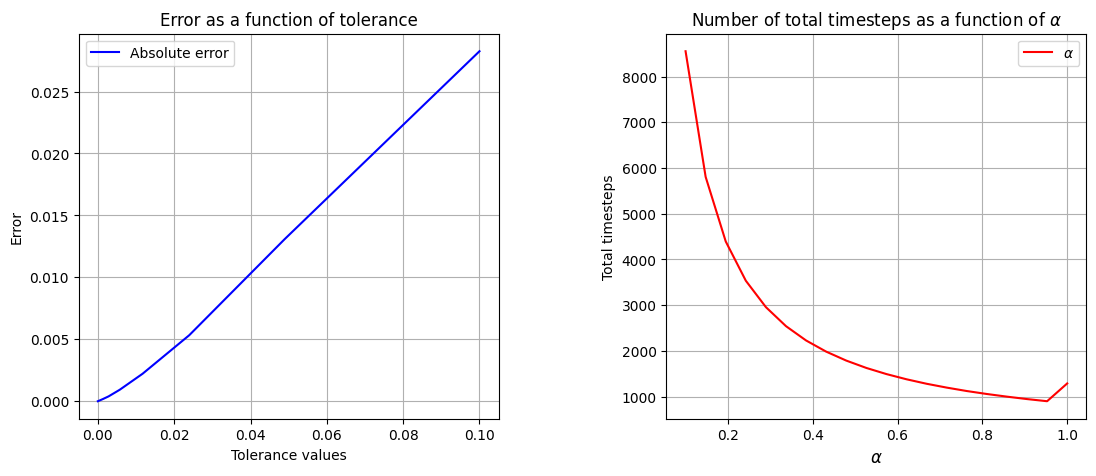

In [8]:
# Plotting

fig, axs = plt.subplots(1, 2, figsize=(13, 5), dpi=100)
plt.subplots_adjust(wspace=0.4)

axs[0].plot(tol_values, errors_tols, 'b-', label='Absolute error')
axs[0].set_xlabel('Tolerance values')
axs[0].set_ylabel('Error')
axs[0].set_title('Error as a function of tolerance')
axs[0].grid(True)
axs[0].legend()

axs[1].plot(alpha_vals, time_steps_alpha, 'r-', label=r'$\alpha$')
axs[1].set_xlabel(r'$\alpha$', fontsize=12)  # Correct LaTeX for x-label
axs[1].set_ylabel('Total timesteps')
axs[1].set_title(r'Number of total timesteps as a function of $\alpha$')
axs[1].grid(True)
axs[1].legend()
plt.show()



We compare the numerical solution to the exact analytical solution using the maximum absolute error, which provides a error estimate. In our method, the local error can be estimated by

$$
\text{est} = |y_{n+1} - z_{n+1}| \approx C\,h^3,
$$

where $C$ is a constant. To keep this error within the tolerance $\text{tol}$, the adaptive step-size control updates the step size using

$$
h_{\text{new}} = \alpha\,h\,\left( \frac{\text{tol}}{\text{est}} \right)^{1/3}.
$$

Substituting the error estimate yields

$$
h_{\text{new}} = \alpha\,h\,\left( \frac{\text{tol}}{C\,h^3} \right)^{1/3} = \alpha\,\frac{\text{tol}^{1/3}}{C^{1/3}},
$$

which shows that $h \propto \text{tol}^{1/3}$ (so $h^3 \propto \text{tol}$). Since the global error is of order $\mathcal{O}(h^3)$, it is approximately proportional to $\text{tol}$.

---

$\alpha$, the pessimist factor, controls how aggressively the step size is modified. A smaller $\alpha$ leads to only minor changes in $h$, resulting in many small timesteps. Conversely, a larger $\alpha$ permits more aggressive increases in $h$, thereby reducing the number of timesteps as observed in the plot. To understand the long-term behavior, we consider the steady state where the step size has stabilized so that $h_{\text{new}} = h$. In our adaptive scheme, the update rule is

$$
h_{\text{new}} = \alpha\,h\,\left(\frac{\text{tol}}{\text{est}}\right)^{1/3},
$$

and using the local error estimate $\text{est} \approx C\,h^3$, we set

$$
h = \alpha\,h\,\left(\frac{\text{tol}}{C\,h^3}\right)^{1/3}.
$$

After raising both sides to the power of 3, we obtain

$$
1 = \alpha^3\,\frac{\text{tol}}{C\,h^3},
$$

which implies

$$
h^3 = \alpha^3\,\frac{\text{tol}}{C}.
$$

Substituting this back into the error estimate gives

$$
\text{est} \approx \alpha^3\,\text{tol}.
$$

A step is accepted only if $\text{est} < \text{tol}$, so we require

$$
\alpha^3 < 1.
$$

Thus, if $\alpha$ is set too high—approaching or exceeding 1—the error will always exceed the tolerance, leading to no accepted steps and causing the algorithm to loop indefinitely. This behavior is reflected in the plot as a spike in the total number of timesteps when $\alpha \rightarrow 1$.

## 1e)

Defining our function for the secant method.

In [9]:
def secand_method(g,z0,z1,tol):

    """
    Find a root of a function using the secant method.
    Iterates until the difference between successive approximations is below tol.

    Args:
        g (callable): Function whose root is to be found.
        z0 (float): First initial guess for the root.
        z1 (float): Second initial guess for the root.
        tol (float): Tolerance for convergence, determining when |z_n - z_{n-1}| < tol.
    Returns:
        tuple: (list, float) - List of all iterates and the final root value.

    """

    z = [z0,z1]
    n = 1
    while np.abs(z[n-1] - z[n])>tol:
      z_new = (z[n-1]*(g(z[n])) - z[n]*g(z[n-1])) / (g(z[n]) - g(z[n-1]))
      z.append(z_new)
      n+=1
    return z[2:],z[-1]

def g(z):
  return z + np.sin(z) + np.cos(z)

In [10]:
print(f"Root of g(z) = z + sin(z) + cos(z): {secand_method(g,-10,100,1e-3)[1].round(6)}")

Root of g(z) = z + sin(z) + cos(z): -0.45663


To confirm that we gotten the correct root, we can, insert it into the
equation

$\quad$

$$z + \sin{z} + \cos{z} = 0$$

$\quad$

$$-0.45664 + \sin{-0.45663} + \cos{-0.45663} \stackrel{?}{=} 0 $$


Calculating this in the cell below, we can see that the anwser is  really close to zero,

In [11]:
print(-0.45664 + np.sin(-0.45663) + np.cos(-0.45663))

-2.2383200187103824e-05


## 1f)

We are creating a function F1, which will be used in the secant method, to give a new value for the solutions y-endpoint, the goal is to satify the boundary condition, which says that $y(2π) = 0$, so the secant method will run, and create new solution until the difference  between succeding possible solutions are less than our ```tol```.
We are running the method, with initial guesses as -12 and 12

In [12]:
def F1(b):
    y_end = solver1.integrate(1e-7, 0.8,[0, b])[1][:,0][-1]
    return y_end

b0, b1 = -12, 12 #inital guesses
b_iterations = secand_method(F1, b0, b1, 1e-7)[0]

In our secant method implementation, the initial guesses $z_0$ and $z_1$ are provided as starting points rather than as iterates generated by the method. Only the values computed thereafter (beginning with the third element in the list) are considered actual iterations. This is why we return $[2:]$ as the list of iterates and only plot those, excluding the initial guesses.

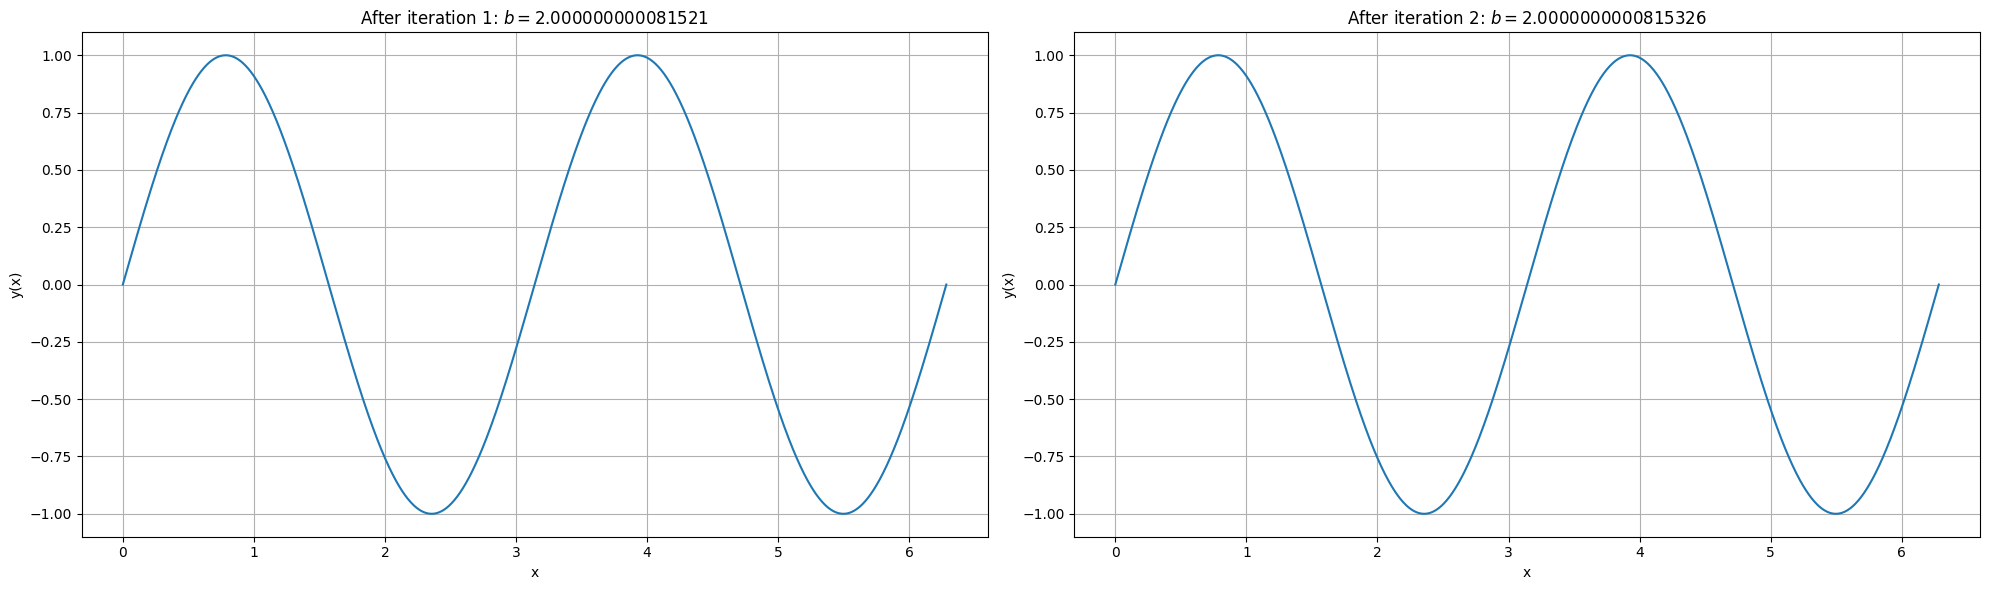

2 iterations were needed for a tolerance of 1e-07 to be satisfied.


In [13]:
n = len(b_iterations)
fig, ax = plt.subplots(nrows=1, ncols=n, figsize=(20, 6))

# Plotting
for i, b in enumerate(b_iterations):
    xs, ys, total_steps, step_lengths = solver1.integrate(1e-7, 0.8, [0, b])
    ax[i].plot(xs, ys[:, 0], label=f"Iteration {i+1} (b = {b})")
    ax[i].set_xlabel("x")
    ax[i].set_ylabel("y(x)")
    ax[i].set_title(f"After iteration {i+1}: $b = {b}$")
    ax[i].grid(True)

plt.tight_layout()
plt.show()
print(f"{len(b_iterations)} iterations were needed for a tolerance of {1e-7} to be satisfied.")


As we can see the secant method converged after 2 iterations. The reason for this fast convergence is that the differential equation is linear, and we only have one uknown boundary condition.




Since we are solving
$
\frac{d^2 y}{dx^2} \;=\;-4 \,\sin(2x),
$
with boundary conditions $y(0)=0$ and $y(2\pi)=0$.  Intergrating this equation twice gives:

$$
   y'(x) =\int -4\,\sin(2x)\,dx =2 \cos(2x) + C_1.
   $$

$$
   y(x)
   \;=\;\int \bigl[2\,\cos(2x)\;+\;C_1\bigr]\,dx
   \;=\;\sin(2x)\;+\;C_1\,x\;+\;C_2.
$$

So the general solution is $y(x) \;=\;\sin(2x)\;+\;C_1\,x\;+\;C_2.$.
$y(0)=0$ implies $C_2 = 0$, and $y'(0)=b$ implies $C_1 = b-2$


Putting these together gives
$$
y_b(x) = \sin(2x) + (b - 2)x.
$$

The boundary condition $y_b(2\pi)=0$ becomes:

$$
y_b(2\pi) = 2\pi\,(b - 2).
$$

This is a linear function of b, any two distinct initial guesses  will find the exact root in one secant iteration.

Since our initial guesses are -n and n, in our case -12 and 12, and as we showed above that this is a linear function of b, the Secant method arrives at the solution with 1 iteration. The reason for two, as shown in the plots, is so the code can maintain our ```tol=10^-7```.


---



## 1g)

To be able to solve the given 2.order differential equation we need to rewerite it to a system of two first order differential equations.

With the given differential equation $ y''(x) = y(x) + \sin(x) $, we start by renaming the dependent variable as $ v $ instead of $ y $, such that we are now working with $ \frac{d^2 v}{dx^2} = v(x) + \sin(x) $. Next, we introduce new variables by setting  
$$
y = v, \quad y' = \frac{dv}{dx}.
$$
Doing this, we obtain the desired vector form,  
$$
\vec{y}(x) = \begin{pmatrix} y(x) \\ y'(x) \end{pmatrix},
$$
such that  
$$
\frac{d}{dx} \vec{y}(x) = \begin{pmatrix} y'(x) \\ y''(x) \end{pmatrix} = \begin{pmatrix} \frac{dv}{dx} \\ v(x) + \sin(x) \end{pmatrix}.
$$


Finally, because the boundary conditions are $ y(0) = 0 $ and $ y(12) = 0 $, and we need to determine the $y'(0) = b $, these translate into  
$$
\vec{y}(0) = \begin{pmatrix} 0 \\ b \end{pmatrix}.
$$


In [14]:
def f2(x, Y):
    return np.array([Y[1], Y[0] + np.sin(x)])


Solving it in the same way as we did above

In [15]:
solver2 = RK3_2(x_init = 0, x_end =12 ,f = f2, h0 = 0.07)

def y_b2(b):
    y_end = solver2.integrate(1e-7, 0.8,[0, b])[1][:,0][-1]
    return y_end

#initial guess
b0, b1 = -12,12
b_iterations, b_final = secand_method(y_b2, b0, b1, 1e-7)
final_xs, final_ys, total_steps, step_lengths = solver2.integrate(1e-7, 0.8, [0, b_final])

Taking the time, because it will be used in the next task

In [16]:
%timeit b_iterations, b_final = secand_method(y_b2, b0, b1, 1e-7)
%timeit final_xs, final_ys, total_steps, step_lengths = solver2.integrate(1e-7, 0.8, [0, b_final])

1.69 s ± 116 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.23 ms ± 351 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


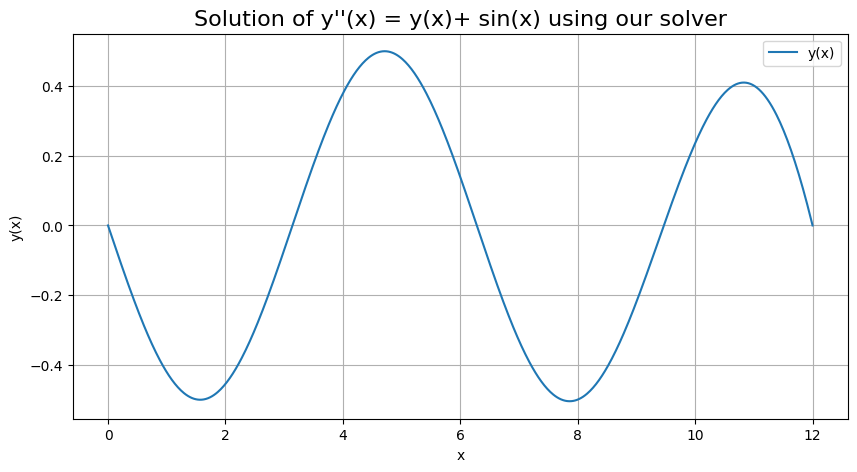

In [17]:
# Plotting the solution
plt.figure(figsize=(10, 5))
plt.plot(final_xs,final_ys[:,0],label = "y(x)")
plt.xlabel("x")
plt.ylabel("y(x)")
plt.title(f"Solution of y''(x) = y(x)+ sin(x) using our solver",fontsize = 16)
plt.grid(True)
plt.legend()
plt.show()


Compared to $ y''(x) = \sin(x) $, the equation

$$
y''(x) = y(x) + \sin(x)
$$

includes an extra $y(x)$ term that introduces exponential damping, yielding a damped sinusoid.

## 1h)

Importing ```solve_bvb``` from scipy

In [18]:
from scipy.integrate import solve_bvp

Defining the boundary condition residual, in a form that is acceptable for scipy's solver.

In [19]:
def boundary_cond(ya,yb):
  return np.array([ya[0]-0,yb[0]-0])

Defining an x-axis from 0 to 12 with 1000 points, and an inital solution guess, which we have chosen to be ones

In [20]:
points = 1000
x = np.linspace(0, 12, points)
initial_solution_guess = np.ones((2, points))


Solving using scipy's solver

In [21]:
bvp_solution = solve_bvp(f2, boundary_cond, x, initial_solution_guess)

Using timeit to find the time taken

In [22]:
%timeit bvp_solution = solve_bvp(f2, boundary_cond, x, initial_solution_guess)
bvp_solution_values = bvp_solution.y[0]

1.07 ms ± 31 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


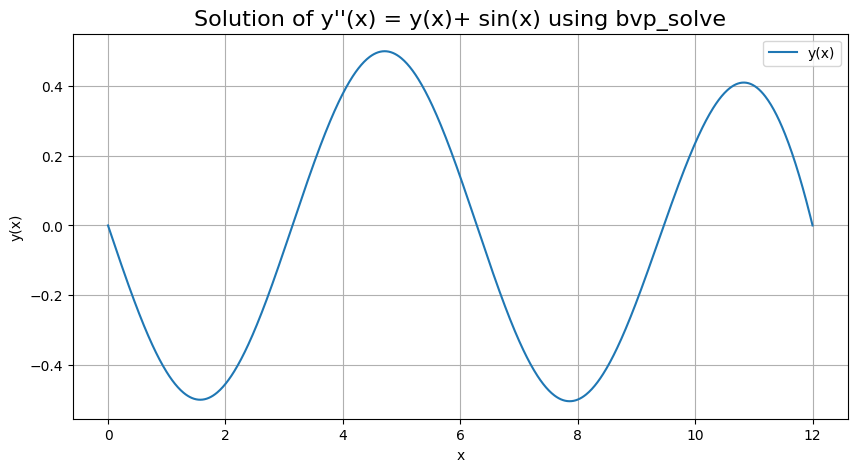

In [23]:
# Plotting

plt.figure(figsize=(10, 5))
plt.plot(x,bvp_solution_values, label='y(x)')
plt.xlabel('x')
plt.ylabel('y(x)')
plt.title("Solution of y''(x) = y(x)+ sin(x) using bvp_solve",fontsize = 16)
plt.grid(True)
plt.legend()
plt.show()


From the plot we can see that we are getting the same damped sinusoidal solution as in 1g)

---

Next we are interpolating our solutions x-values onto scipy's solution, to be able to compare the difference.

In [24]:
bvp_solution_interpolated = bvp_solution.sol(final_xs)[0]
difference = final_ys[:, 0] - bvp_solution_interpolated

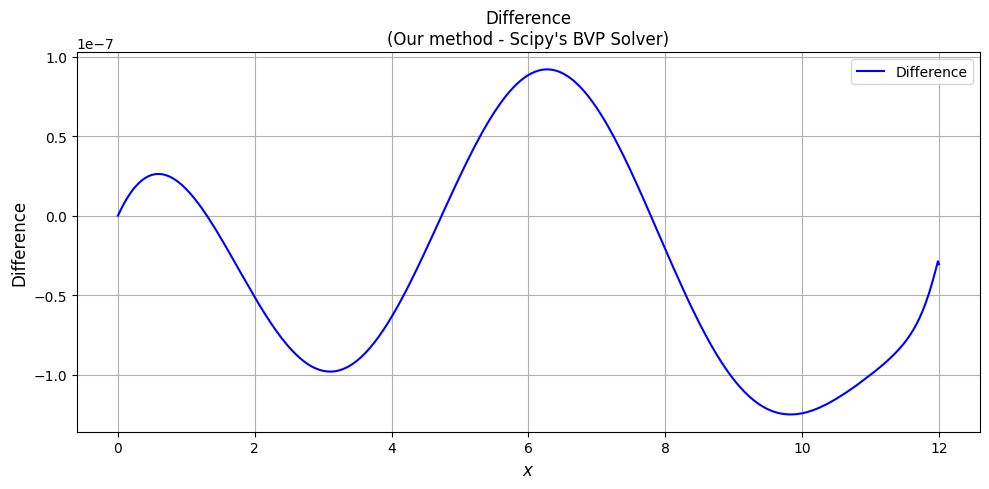

In [25]:
fig, ax = plt.subplots( figsize=(10, 5))

ax.plot(final_xs, difference, label='Difference', color='blue')
ax.set_xlabel('$x$', fontsize=12)
ax.set_ylabel('Difference', fontsize=12)
ax.set_title("Difference\n(Our method - Scipy's BVP Solver)")
ax.grid(True)
ax.legend()


plt.tight_layout()
plt.show()


From the plot we can generally say that the difference is small, because it is on the scale of $10^{-7}$. Something else we observe is that the difference also oscillates, and we can see that the peaks and troughs in the plot above aligns closesly with the inflection points of the solution $y(x)$.

To compare the time taken we can see that our solver used around 1.82 sec, while scipy's used 1.06 ms, so choosing scipy's solver would be more time efficient.

----

# Exercise 2

## 2a)

In [26]:
def matrix_to_vector(M):
    """
    Convert a 2x2 complex matrix to an 8-component real vector.

    Args:
        M (np.ndarray): 2x2 complex-valued matrix.

    Returns:
        np.ndarray: Vector of shape (8,)
    """

    real = M.real.flatten()
    imaginary = M.imag.flatten()
    return np.concatenate([real,imaginary])

In [27]:
def vector_to_matrix(v):
    """
    Convert an 8-component real vector to a 2x2 complex matrix.

    Args:
        v (np.ndarray): Vector of shape (8,) with real components first, followed by imaginary components.

    Returns:
        np.ndarray: 2x2 complex-valued matrix

    """

    real = v[:4]
    imaginary = v[4:]
    flattened = real + 1j*imaginary
    return flattened.reshape(2,2)

## 2b)

In [28]:
def transform_to_32(m1,m2,m3,m4):
    """
    Combine four 8-component vectors into a single 32-component vector.

    Args:
        m1, m2, m3, m4 (np.ndarray): Four input vectors, each with shape (8,).

    Returns:
        np.ndarray: Concatenated vector of shape (32,), ordered as [m1 | m2 | m3 | m4].

    """
    return np.concatenate([m1,m2,m3,m4])

def transform_from_32(v):
    """
    Split a 32-component vector into four 8-component vectors.

    Args:
        v (np.ndarray): Input vector of shape (32,).

    Returns:
        tuple: Four vectors (m1, m2, m3, m4), each with shape (8,).
    """
    m1 = v[:8]
    m2 = v[8:16]
    m3 = v[16:24]
    m4 = v[24:32]
    return m1,m2,m3,m4


## 2c)

In [29]:
def rewrite_system_to_32(gamma,gamma_tilde,omega,omega_tilde):
    """
    Combines four 2x2 complex matrices into a single 32-component real vector.

    Args:
        gamma (np.ndarray): 2x2 complex matrix representing γ(x, ε).
        gamma_tilde (np.ndarray): 2x2 complex matrix representing γ̃(x, ε).
        omega (np.ndarray): 2x2 complex matrix representing ω(x, ε).
        omega_tilde (np.ndarray): 2x2 complex matrix representing ω̃(x, ε).

    Returns:
        np.ndarray: 32-component real vector
    """

    t_gamma = matrix_to_vector(gamma)
    t_gamma_tilde = matrix_to_vector(gamma_tilde)
    t_omega = matrix_to_vector(omega)
    t_omega_tilde = matrix_to_vector(omega_tilde)
    vec_32 = transform_to_32(t_gamma,t_gamma_tilde,t_omega,t_omega_tilde)
    return vec_32

def rewrite_system_from_32(v):

    """
    Splits a 32-component real vector into four 2x2 complex matrices.

    Args:
        v (np.ndarray): 32-component real vector containing flattened matrix data.

    Returns:
        tuple: Four 2x2 complex matrices (gamma, gamma_tilde, omega, omega_tilde).
    """

    gamma,gamma_tilde,omega,omega_tilde = transform_from_32(v)
    gamma_matrix = vector_to_matrix(gamma)
    gamma_tilde_matrix = vector_to_matrix(gamma_tilde)
    omega_matrix = vector_to_matrix(omega)
    omega_tilde_matrix = vector_to_matrix(omega_tilde)
    return gamma_matrix,gamma_tilde_matrix,omega_matrix,omega_tilde_matrix


## 2d)

We define $\delta$  and $\zeta$ as global variables, because they will not change. We are also defining som constant matricies as global variables, because they will be used in the next tasks.

In [30]:
delta = 0.01
zeta = 3.0
I2 = np.eye(2, dtype=complex)
zero2x2 = np.zeros((2,2),dtype = complex)

In [31]:
def usadel_single_pos_and_energy(v_vec, epsilon):
    """
    Compute the spatial derivative of the usadel function at a
    single position and epsilon value.

    Parameters
    ----------
    v_vec : array_like of shape (32,)
        The flattened state vector containing the 2×2 complex matrices gamma, gamma_tilde,
        omega, and omega_tilde.
    epsilon : float or complex
        The energy variable for which the derivatives are computed.

    Returns
    -------
    dv_dx_vec : numpy.ndarray of shape (32,)
        The flattened derivative vector representing the spatial derivative of all 2×2
        matrices (gamma, gamma_tilde, omega, and omega_tilde).

    """
    # Unpacking the Ricatti matrices, and their derivatives
    gamma, gamma_tilde, omega, omega_tilde = rewrite_system_from_32(v_vec)

    # Compute N and N_tilde
    N = np.linalg.inv(I2 - gamma @ gamma_tilde)
    N_tilde = np.linalg.inv(I2 - gamma_tilde @ gamma)

    # Compute right-hand sides of the Usadel equations:
    dgamma_dx = omega
    dgamma_tilde_dx = omega_tilde
    domega_dx = -2j*(epsilon + 1j*delta)*gamma - 2 * (omega @ N_tilde @ gamma_tilde @ omega)
    domega_tilde_dx = -2j*(epsilon + 1j*delta)*gamma_tilde - 2 * (omega_tilde @ N @ gamma @ omega_tilde)

    # Convert these four 2x2 complex derivatives back to a (32,)-vector
    dgamma_vec = matrix_to_vector(dgamma_dx)
    dgamma_tilde_vec = matrix_to_vector(dgamma_tilde_dx)
    domega_vec = matrix_to_vector(domega_dx)
    domega_tilde_vec = matrix_to_vector(domega_tilde_dx)

    dv_dx_vec = transform_to_32(dgamma_vec, dgamma_tilde_vec, domega_vec, domega_tilde_vec)
    
    return dv_dx_vec

## 2e)

We use a factory function to wrap the right-hand side of the equation so that $\varepsilon$ can be used as a parameter in our solution. This approach creates a function compatible with `solve_bvp`, which is necessary for the subsequent tasks.

In [32]:
def create_usadel_complete(epsilon):
    """
    Create a function that computes the Usadel equation derivatives for multiple
    states or positions at a fixed energy.

    This factory function returns a function `usadel_complete(x, v_matrix)` which
    applies `usadel_single_pos_and_energy` to each column of the input matrix
    `v_matrix`. The resulting derivatives are collected into a matrix of the same
    shape as `v_matrix`.

    Parameters
    ----------
    epsilon : float
        The fixed energy parameter.

    Returns
    -------
    usadel_complete : callable
        A function that computes the derivatives for an array of Usadel system
        states. Its signature is:

        usadel_complete(x, v_matrix)

        where:

        - x : float
            The spatial coordinate at which the derivatives are computed (not
            directly used in the calculations here, but included for compatibility
            with scipy's BDV solver.
        - v_matrix : numpy.ndarray of shape (n, m)
            The state matrix whose columns represent different sets of parameters
            in flattened form.

        The returned value is a numpy.ndarray of shape (n, m), containing the
        computed derivatives for each column.

    """
    def usadel_complete(x, v_matrix):
        m = v_matrix.shape[1]

        # Preallocate array for dv/dx at each x
        dv_dx = np.zeros_like(v_matrix, dtype=complex)

        for i in range(m):
            dv_dx[:,i] = usadel_single_pos_and_energy(v_matrix[:, i], epsilon)
        return dv_dx

    return usadel_complete


## 2f)

In exercise 2, we need to implement two distinct boundary conditions. To achieve this, we create a general boundary condition factory function that accepts all necessary parameters and can generate any specific boundary condition required.

In [33]:
def bc_general(
    v_left, v_right,
    gamma_L, gamma_tilde_L, gamma_R, gamma_tilde_R,
    zeta, l
):
    """
    Compute the general boundary condition residual..

    Parameters
    ----------
    v_left : array_like
        Flattened state vector at the left boundary.
    v_right : array_like
        Flattened state vector at the right boundary.
    gamma_L, gamma_tilde_L, gamma_R, gamma_tilde_R : array_like
        2×2 matrices used for the left and right boundaries.
    zeta : float
        Scaling parameter.
    l : float
        length.

    Returns
    -------
    bc_res : numpy.ndarray
        32-element residual vector.
    """
    # Unpacking the Ricatti matrices, and their derivatives
    gamma_left, gamma_tilde_left, omega_left, omega_tilde_left = rewrite_system_from_32(v_left)
    gamma_right, gamma_tilde_right, omega_right, omega_tilde_right = rewrite_system_from_32(v_right)

    # Compute N_L, N_R and tilde variants
    N_L = np.linalg.inv(I2 - gamma_L @ gamma_tilde_L)
    N_tilde_L = np.linalg.inv(I2 - gamma_tilde_L @ gamma_L)

    N_R = np.linalg.inv(I2 - gamma_R @ gamma_tilde_R)
    N_tilde_R = np.linalg.inv(I2 - gamma_tilde_R @ gamma_R)

    # Form the boundary condition residuals (eq. 13–16)
    bc_left_gamma = omega_left + (1/(zeta*l)) * (
        (I2 - gamma_left @ gamma_tilde_L) @ N_L @ (gamma_L - gamma_left)
    )
    bc_left_gamma_tilde = omega_tilde_left + (1/(zeta*l)) * (
        (I2 - gamma_tilde_left @ gamma_L) @ N_tilde_L @ (gamma_tilde_L - gamma_tilde_left)
    )
    bc_right_gamma = omega_right - (1/(zeta*l)) * (
        (I2 - gamma_right @ gamma_tilde_R) @ N_R @ (gamma_R - gamma_right)
    )
    bc_right_gamma_tilde = omega_tilde_right - (1/(zeta*l)) * (
        (I2 - gamma_tilde_right @ gamma_R) @ N_tilde_R @ (gamma_tilde_R - gamma_tilde_right)
    )

    # Convert each 2x2 matrix residual to an 8-element real vector
    bc_left_gamma_vec = matrix_to_vector(bc_left_gamma)
    bc_left_gamma_tilde_vec = matrix_to_vector(bc_left_gamma_tilde)
    bc_right_gamma_vec = matrix_to_vector(bc_right_gamma)
    bc_right_gamma_tilde_vec = matrix_to_vector(bc_right_gamma_tilde)

    # Concatenate into one 32-element residual vector
    bc_res = transform_to_32(bc_left_gamma_vec, bc_left_gamma_tilde_vec,
                             bc_right_gamma_vec, bc_right_gamma_tilde_vec)
    return bc_res


Here we use the general boundary condition function to specify the conditions where the Riccati matrices vanish,

$\gamma_L = \tilde{\gamma}_L = \gamma_R = \tilde{\gamma}_R = 0.$

This function will then serve as the boundary condition input for ```solve_bvp```








In [34]:
def make_bc_normal(l):
    def bc_normal(v_left, v_right):
        return bc_general(v_left, v_right, zero2x2, zero2x2, zero2x2, zero2x2, zeta, l)
    return bc_normal



## 2g)

We start by defining the parameters for the solution, and an empty array to save the solutions

In [35]:
l = 1
m = 101
x = np.linspace(0, l, m)
y = np.zeros((32, m))
epsilon_arr = np.array([0, 1, 2])
solution_arr = np.empty(epsilon_arr.shape, dtype=object)

We iterate through the  $\varepsilon$-array, find the solution for each $\varepsilon$, and we confirm that they are numerically zero.

In [36]:
for i, epsilon in enumerate(epsilon_arr):
    usadel_func = create_usadel_complete(epsilon)
    sol = solve_bvp(usadel_func, make_bc_normal(l), x, y)
    solution_arr[i] = sol

    # Testing the accuracy of the solver
    tol = 1e-10
    if np.allclose(sol.y, 0, atol=tol):
        print(f"The solution with epsilon= {epsilon} is numerically zero.")
    else:
        print(f"The solution with epsilon= {epsilon} is not numerically zero.")

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/integrate/_bvp.py:646: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(fun(x, y), dtype)


The solution with epsilon= 0 is numerically zero.
The solution with epsilon= 1 is numerically zero.
The solution with epsilon= 2 is numerically zero.


## 2h)

We are creating two helper functions to compute the density of states for a given $ \hat{g}(x,\epsilon) $ and a function to construct the $ \hat{g}(x,\epsilon) $ matrix.


In [37]:
def compute_DOS(g_hat):
    """
    Compute the density of states (DOS) from the given Green's function matrix.

    Parameters:
    -----------
    g_hat : numpy.ndarray
        A 4x4 complex matrix representing the Green's function.
    Returns:
    --------
    float
        The computed density of states (DOS).

    """
    rho3 = np.block([[I2, zero2x2],[zero2x2, -I2]])
    dos = np.real(np.trace(rho3 @ g_hat))/4.0
    return dos

def construct_g_hat(gamma, gamma_tilde, N, N_tilde):
    """
    Construct the Green's function matrix.

    Parameters:
    -----------
    gamma : numpy.ndarray
        A 2x2 matrix.

    gamma_tilde : numpy.ndarray
        A 2x2 matrix.

    N : numpy.ndarray
        A 2x2 matrix.

    N_tilde : numpy.ndarray
        A 2x2 matrix.

    Returns:
    --------
    numpy.ndarray
        A 4x4 complex matrix representing the Green's function.
    """

    g_hat = np.block([[2*N - I2, 2*N @ gamma],[-2*N_tilde @ gamma_tilde, -2*N_tilde + I2]])
    return g_hat


Using ```compute_DOS``` and ```construct_g_hat```to calculate the density of state for every solution

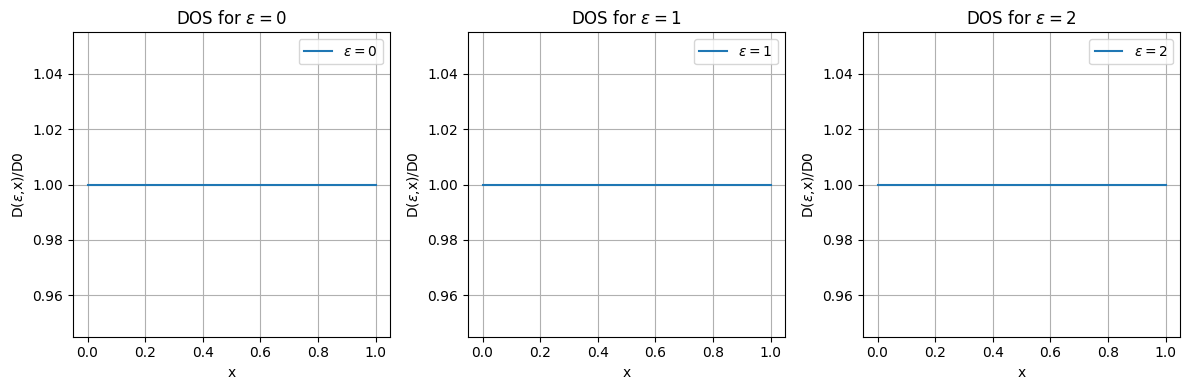

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))

# Loop over each energy and its corresponding solution
for idx, (epsilon, sol) in enumerate(zip(epsilon_arr, solution_arr)):
    x_sol = sol.x  # Spatial grid from the solution
    v_sol = sol.y
    dos_values = np.zeros_like(x_sol, dtype=float)

    # Compute the density of states at each spatial point
    for i in range(len(x_sol)):
        v_i = v_sol[:, i]
        gamma, gamma_tilde, _, _ = rewrite_system_from_32(v_i)
        N = np.linalg.inv(I2 - gamma @ gamma_tilde)
        N_tilde = np.linalg.inv(I2 - gamma_tilde @ gamma)
        g_hat = construct_g_hat(gamma, gamma_tilde, N, N_tilde)
        dos_values[i] = compute_DOS(g_hat)

    # Plot DOS vs. x for the current epsilon value
    axes[idx].plot(x_sol, dos_values, label=f"$\\varepsilon={epsilon}$")
    axes[idx].set_title(f"DOS for $\\varepsilon={epsilon}$")
    axes[idx].set_xlabel("x")
    axes[idx].set_ylabel("D($\\varepsilon$,x)/D0")
    axes[idx].grid(True)
    axes[idx].legend()

plt.tight_layout()
plt.show()


The density of states $D/D_0 = 1$, is independent of $\varepsilon$ as we can see from the plots. This follows from the structure of the Green’s function $\hat{g}$ when the Riccati matrices $\mathbf{\gamma}, \tilde{\mathbf{\gamma}}, \mathbf{\omega}, \tilde{\mathbf{\omega}}$ are zero. Substituting $\mathbf{\gamma} = \tilde{\mathbf{\gamma}} = \mathbf{0}$ into the definitions of $\mathbf{N}$ and $\tilde{\mathbf{N}}$, these matrices reduce to identity matrices ($\mathbf{I}$), simplifying $\hat{g}$ to:  
$$
\hat{g} = \begin{pmatrix} \mathbf{I} & \mathbf{0} \\ \mathbf{0} & -\mathbf{I} \end{pmatrix}.  
$$  
The product $\hat{\rho}_3 \hat{g}$, where $\hat{\rho}_3 = \begin{pmatrix} \mathbf{I} & \mathbf{0} \\ \mathbf{0} & -\mathbf{I} \end{pmatrix}$, becomes:  
$$
\hat{\rho}_3 \hat{g} = \begin{pmatrix} \mathbf{I} & \mathbf{0} \\ \mathbf{0} & \mathbf{I} \end{pmatrix},  
$$  
yielding $\text{Tr}(\hat{\rho}_3 \hat{g}) = 4$. Normalizing by $4$ gives $D/D_0 = \Re(1) = 1$, a constant for all $\varepsilon$.  

Physically, the uniformity of $D/D_0 \approx 1$ across $x$ and $\varepsilon$ reflects the absence of superconducting proximity effects. Since the normal metal is interfaced with other normal metals $|\Delta| = 0$, no superconducting correlations penetrate into the system. The flat DOS confirms the system behaves as completely as a normal metal, .

## 2i)

We define different functions to be able to compute the given quantities for the new boundary condition

In [39]:
def Theta(sigma, epsilon):
    return np.arctanh(sigma / (epsilon + 1j * delta))

def s_func(sigma, epsilon):
    return np.sinh(Theta(sigma, epsilon))

def c_func(sigma, epsilon):
    return np.cosh(Theta(sigma, epsilon))


Since the matrices $\gamma_L$ and $\gamma_R$ are identical, and likewise $\tilde{\gamma}_L$ and $\tilde{\gamma}_R$ are identical, the only difference between the left and right superconductors lies in their phases. Therefore, we define two functions, $\texttt{gamma\_sc}$ and $\texttt{gamma\_tilde\_sc}$, to compute the corresponding Riccati matrices for a superconductor at a given energy $\varepsilon$ and phase $\phi$.

In [40]:
def gamma_sc(epsilon, phi=0):
    """
    Compute the gamma Riccati matrix for a superconductor with phase phi.

    Args:
        epsilon (float): Energy parameter.
        phi (float, optional): Superconducting phase. Defaults to 0.

    Returns:
        np.ndarray: 2x2 complex matrix representing gamma.
    """
    base = np.block([
        [0, s_func(1, epsilon) / (1 + c_func(1, epsilon))],
        [s_func(-1, epsilon) / (1 + c_func(-1, epsilon)), 0]
    ])
    return base * np.exp(1j * phi)


def gamma_tilde_sc(epsilon, phi=0):
    """
    Compute the gamma_tilde matrix for a superconductor with phase phi.

    Args:
        epsilon (float): Energy parameter.
        phi (float, optional): Superconducting phase. Defaults to 0.

    Returns:
        np.ndarray: 2x2 complex matrix representing gamma_tilde.
    """
    base = np.block([
        [0, s_func(-1, epsilon) / (1 + c_func(-1, epsilon))],
        [s_func(1, epsilon) / (1 + c_func(1, epsilon)), 0]
    ])
    return base * np.exp(-1j * phi)


Updating our factory function so its able to use the new boundary condtion in ```bvb_solve```

In [41]:
def create_bc_sc_sc(epsilon, l, phi_L=0, phi_R=0):
    """
    Create a boundary condition function for an SNS  junction.

    This factory function generates a boundary condition function suitable for use with
    scipy's solve_bvp solver. 

    Parameters
    ----------
    epsilon : float
        energy parameter.
    l : float
        length of the normal region.
    phi_L : float, optional
        superconducting phase for the left. Default is 0.
    phi_R : float, optional
        superconducting phase for the right. Default is 0.

    Returns
    -------
    callable
        A boundary condition function that takes two arguments (v_left, v_right) and returns
        the residual vector for use with solve_bvp.
    """

    # Compute Riccati matrices for the left superconductor.
    gammaL = gamma_sc(epsilon, phi_L)
    gamma_tildeL = gamma_tilde_sc(epsilon, phi_L)
    
    # Compute Riccati matrices for the right superconductor.
    gammaR = gamma_sc(epsilon, phi_R)
    gamma_tildeR = gamma_tilde_sc(epsilon, phi_R)

    def bc_sc_sc(v_left, v_right):
        # Apply the general boundary condition function with the computed Riccati matrices,
        # a fixed (zeta=3), and the length l.
        return bc_general(
            v_left, v_right,
            gamma_L=gammaL, gamma_tilde_L=gamma_tildeL,
            gamma_R=gammaR, gamma_tilde_R=gamma_tildeR,
            zeta=3, l=l
        )
    return bc_sc_sc


## 2j)

We define the given parameters

In [42]:
l = 1
m = 101
epsilon = 2
x = np.linspace(0, l, m)
y = np.zeros((32, m))

Initializing the acceptable left hand side and right hand side for the ```solve_bvp```.

In [43]:
bc_sc_sc = create_bc_sc_sc(epsilon, l)
usadel_func = create_usadel_complete(epsilon)

Solving the boundary value problem

In [44]:
sol = solve_bvp(usadel_func, bc_sc_sc, x, y)
x_sol = sol.x
v_sol = sol.y

Using ```compute_DOS``` and ```construct_g_hat``` to calculate the density of states across the x-axis.





In [45]:
dos_values = np.zeros_like(x_sol, dtype=float)

for i in range(len(x_sol)):
   v_i = v_sol[:, i]

   gamma, gamma_tilde, _, _ = rewrite_system_from_32(v_i)
   N = np.linalg.inv(I2 - gamma @ gamma_tilde)
   N_tilde = np.linalg.inv(I2 - gamma_tilde @ gamma)
   g_hat = construct_g_hat(gamma, gamma_tilde, N, N_tilde)
   dos_values[i] = compute_DOS(g_hat)


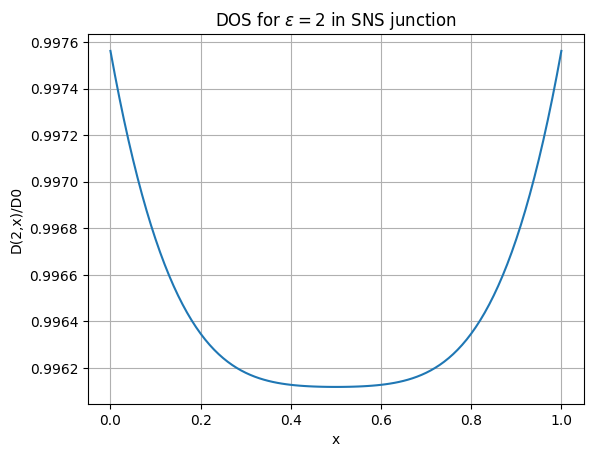

In [46]:
fig, ax = plt.subplots()
ax.set_title(r"DOS for $\varepsilon=2$ in SNS junction")
ax.set_xlabel("x")
ax.set_ylabel("D(2,x)/D0")
ax.plot(x_sol, dos_values)
ax.grid(True)
plt.show()


At $\varepsilon = 2$ ($E - E_F = 2|\Delta|$), the energy lies far above the superconducting gap $|\Delta|$. In a pure superconductor (fig. 1), the density of states asymptotically approaches the normal-metal value $D/D_0 = 1$ at such energies, as the system transitions to normal-state behavior outside the gap. However, in the SNS junction, where a normal metal is sandwiched between two superconductors, the proximity effect allows superconducting correlations to leak into the normal region. These correlations induce a minigap, suppressing the DOS below $D/D_0 = 1$ even at $\varepsilon = 2$. The suppression is strongest at the midpoint ($x = l/2$) due to constructive interference of order parameters from both superconductors. By contrast, when the normal metal has normal boundaries, no proximity effect occurs, and the DOS remains uniformly $D/D_0 = 1$. This shows how superconducting boundaries modify the states in the normal metal.


## 2k)

Here we define the simulation parameters and create a dictionary to store the results. This allows us to easily reuse the data in subsequent tasks.

In [47]:
l_values = [0.5, 1.0, 2.0]
epsilon_arr = np.linspace(2.0, 0.0, 101)
m = 101 

results = {l: {'epsilon': epsilon_arr,
               'dos_mid': np.zeros_like(epsilon_arr),
               'solution' : np.zeros(len(epsilon_arr),
                            dtype = object)} for l in l_values}


In [48]:
for l in l_values:
    x_pos = np.linspace(0, l, m)
    y_guess = np.zeros((32, m))  # Initial guess

    for i, epsilon in enumerate(epsilon_arr):
        
        # Define boundary conditions and Usadel function
        bc_sc_sc = create_bc_sc_sc(epsilon, l)
        usadel_func = create_usadel_complete(epsilon)

        # Solve BVP
        sol = solve_bvp(usadel_func, bc_sc_sc, x_pos, y_guess)
        results[l]["solution"][i] = sol

        # Update guess for next energy
        y_guess[:] = sol.sol(x_pos)

        # Compute DOS at midpoint (x = l/2)
        mid_idx = m // 2
        v_mid = sol.y[:, mid_idx]
        gamma, gamma_tilde, _, _ = rewrite_system_from_32(v_mid)
        N = np.linalg.inv(I2 - gamma @ gamma_tilde)
        N_tilde = np.linalg.inv(I2 - gamma_tilde @ gamma)
        g_hat = construct_g_hat(gamma, gamma_tilde, N, N_tilde)
        dos = compute_DOS(g_hat)

        # Save result
        results[l]['dos_mid'][i] = dos

    print(f"Completed l={l}")

Completed l=0.5
Completed l=1.0
Completed l=2.0


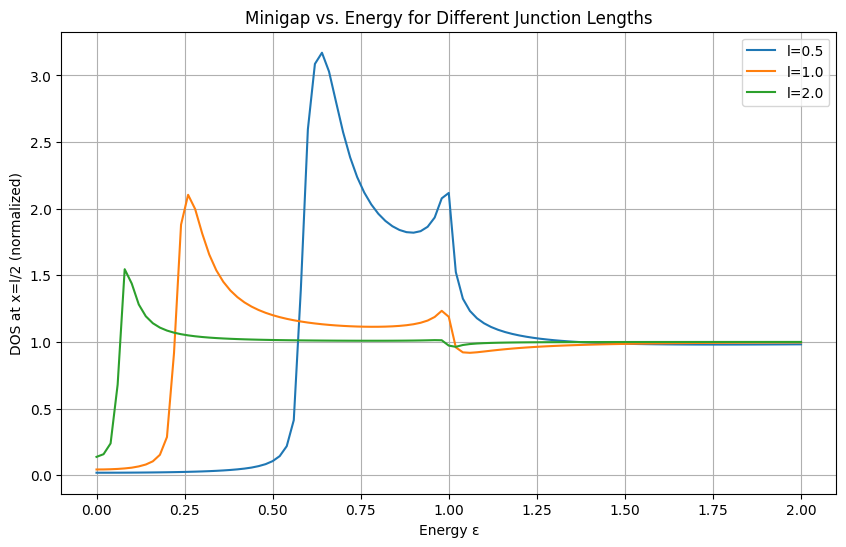

In [49]:
plt.figure(figsize=(10, 6))
for l in l_values:
    epsilon_ascending = results[l]['epsilon'][::-1]
    dos_ascending = results[l]['dos_mid'][::-1]
    plt.plot(epsilon_ascending, dos_ascending, label=f"l={l}")

plt.xlabel("Energy ε")
plt.ylabel("DOS at x=l/2 (normalized)")
plt.title("Minigap vs. Energy for Different Junction Lengths")
plt.legend()
plt.grid(True)
plt.show()

We solve the Usadel equations in an SNS configuration for various dimensionless junction lengths: $l = 0.5$, $l = 1.0$, and $l = 2.0$. The results show how proximity-induced superconducting correlations modify the density of states in the normal segment and how these effects vanish as the junction length increases.

For $l = 0.5$, the short normal region allows superconducting correlations to penetrate from both ends, resulting in a pronounced suppression of the DOS near $\varepsilon = 0$ (a “minigap”) where the DOS is much lower than the normal-metal value.

For $l = 1.0$, the proximity effect is weaker at the midpoint. Although the DOS is still suppressed at low energies, the gap is narrower and the coherence peaks are less pronounced.

For $l = 2.0$ the minigap nearly closes, and the DOS over most of the low-energy range reverts to nearly the value of a normal metal—with only a slight dip near $\varepsilon = 0$.

Moreover, the total area under each DOS curve remains constant, reflecting the conservation of the total number of states. The states missing from the low-energy region in the minigap are redistributed to higher energies, forming the observed coherence peaks.


## 2l)

In [50]:
def helper_func(v_vect):
    """
    Compute the current integrand contribution from a 32-component state vector using the given formulas.

    """
    rho3 = np.block([[I2, np.zeros((2, 2), dtype=complex)],
                     [np.zeros((2, 2), dtype=complex), -I2]])
    gamma, tgamma, omega, tomega = rewrite_system_from_32(v_vect)

    # Compute N, tN, and their derivatives
    N = np.linalg.inv(I2 - gamma @ tgamma)
    tN = np.linalg.inv(I2 - tgamma @ gamma)
    dN_dx = N @ (omega @ tgamma + gamma @ tomega) @ N
    dtN_dx = tN @ (tomega @ gamma + tgamma @ omega) @ tN

    # Assemble the 4x4 matrix g
    g_top = (2 * N) - I2
    g_upper_right = 2 * (N @ gamma)
    g_lower_left = -2 * (tN @ tgamma)
    g_bottom = (-2 * tN) + I2
    g = np.block([[g_top, g_upper_right],
                  [g_lower_left, g_bottom]])

    # Derivative of g (dg)
    dg_upper_left = dN_dx
    dg_upper_right = (N @ omega) + (dN_dx @ gamma)
    dg_lower_left = -(tN @ tomega) - (dtN_dx @ tgamma)
    dg_lower_right = -dtN_dx
    dg = 2 * np.block([[dg_upper_left, dg_upper_right],
                       [dg_lower_left, dg_lower_right]])

    # Current integrand: trace(rho3 * (g*dg - dg*g))
    term = rho3 @ (g @ dg - dg @ g)
    j_val = np.trace(term).real
    return j_val


def compute_current_integrand(sol, l, m=101, x=None):
    """
    Compute the current integrand j(x, ε) along the interval [0, l].

    Parameters
    ----------
    sol : object
        The solution object returned by solve_bvp.
    l : float
        Length of the normal region.
    m : int, optional
        Number of points at which to evaluate the current integrand. Default is 100.
    x : float, optional
        A single position at which to evaluate the current integrand. If not provided,
        the function computes it for all points in [0, l].

    Returns
    -------
    x_fixed : np.ndarray
        The array of x-values (if x=None) or the original grid (if x is given).
    j : np.ndarray or float
        The current integrand values. If x=None, this is an array of length m.
        Otherwise, it's a single float.
    """
    x_fixed = np.linspace(0, l, m)
    j = np.zeros_like(x_fixed)

    if x is None:
        # Compute j(x, ε) at a series of points
        for i, x_pos in enumerate(x_fixed):
            vec_v = sol.sol(x_pos)  # 32-component state vector
            j[i] = helper_func(vec_v)
        return x_fixed, j
    else:
        # Compute j(x, ε) at a single point
        vec_v = sol.sol(x)
        j_val = helper_func(vec_v)
        return x_fixed, j_val




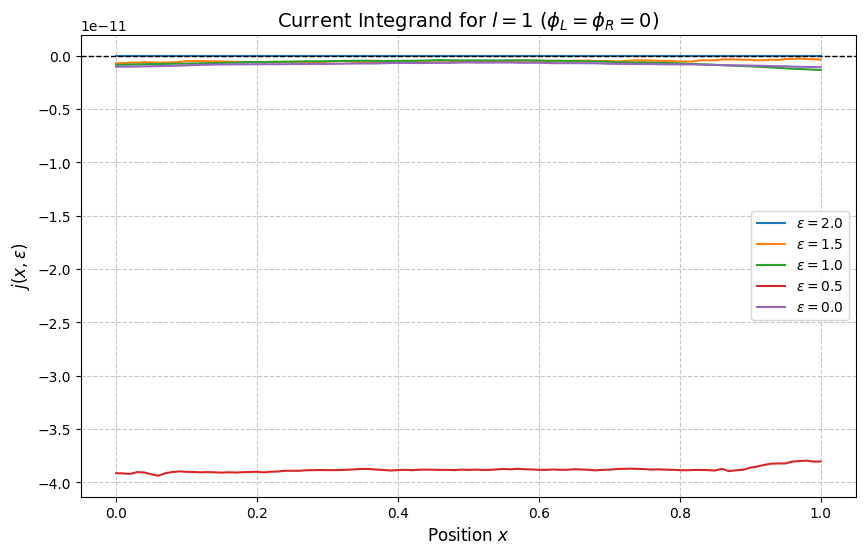

In [51]:
# Plot the current integrand for the energies.

epsilon_targets = [2.0, 1.5, 1.0, 0.5, 0.0]
l = 1.0

plt.figure(figsize=(10, 6))


for epsilon in epsilon_targets:
    idx = np.where(results[l]['epsilon'] == epsilon)[0][0]
    sol = results[l]['solution'][idx]
    x_vals, j_vals = compute_current_integrand(sol, l)
    plt.plot(x_vals, j_vals, label=f"$\\varepsilon = {epsilon}$")


plt.xlabel("Position $x$", fontsize=12)
plt.ylabel("$j(x, \\varepsilon)$", fontsize=12)
plt.title("Current Integrand for $l = 1$ ($\\phi_L = \\phi_R = 0$)", fontsize=14)
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.axhline(0, color="black", linestyle="--", linewidth=1)
plt.show()

Because there is no phase difference between the two superconductors $\phi_L = \phi_R = 0$, the current integrand should be zero. Indeed, the plotted current integrand remains near $10^{-11}$, confirming that the solver finds the correct solution. The small discrepancy at $\varepsilon = 0.5$ is most likely due to numerical roundoff errors in some of the computations, as there is nothing physically unique about that particular energy.

# 2m)

Defining the parameters, and creating a dictionary to save the results so they can be used later.

In [52]:
l = 1
epsilon_arr = np.linspace(2.0, 0.0, 101)
m = 101
phi_l = 1
phi_r = 0
x_pos = np.linspace(0, l, m)
y_guess = np.zeros((32, m))
results_new = {'epsilon': epsilon_arr, 'solution' : np.zeros(len(epsilon_arr),dtype = object)}


In [53]:
# Solve the BVP for each energy and store the solutions
for i, epsilon in enumerate(epsilon_arr):
    bc_sc_sc = create_bc_sc_sc(epsilon, l, phi_l, phi_r)  
    usadel_func = create_usadel_complete(epsilon)         
    sol = solve_bvp(usadel_func, bc_sc_sc, x_pos, y_guess)   
    results_new["solution"][i] = sol                      
    y_guess[:] = sol.sol(x_pos)                          



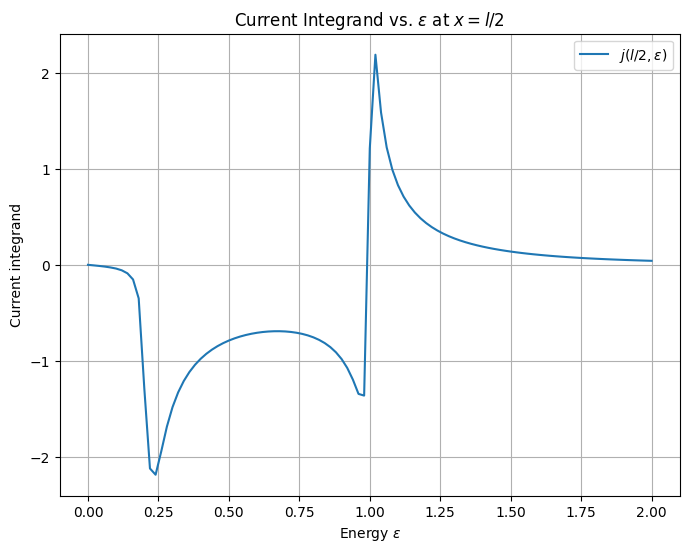

In [54]:
# Compute the current integrand at the midpoint (x = l/2) for each energy
currents_l_2_middle = np.zeros(len(epsilon_arr), dtype=float)
for i, epsilon in enumerate(epsilon_arr):
    sol = results_new["solution"][i]
    _, j_val = compute_current_integrand(sol, l, m, x=l/2)
    currents_l_2_middle[i] = j_val
    
plt.figure(figsize=(8, 6))
plt.plot(epsilon_arr, currents_l_2_middle, label=r"$j(l/2,\varepsilon)$")
plt.xlabel(r"Energy $\varepsilon$")
plt.ylabel("Current integrand")
plt.title(r"Current Integrand vs. $\varepsilon$ at $x = l/2$")
plt.legend()
plt.grid(True)
plt.show()



In the previous exercise, the current integrand was zero for $\varepsilon = \{2, 1.5, 1.0, 0.5, 0\}$ when no phase difference was present. In this exercise, we set $\Delta \phi = 1$, which alters the superconducting correlations in the normal region. Consequently, the current integrand becomes nonzero for different energy levels, indicating that certain energies now contribute to the Josephson supercurrent.

The current integrand $j(l/2, \varepsilon)$ varies with energy, changing sign and exhibiting distinct peaks. Positive values indicate a net contribution in one direction, while negative values indicate the opposite. The prominent peak near $\varepsilon \approx 1$ suggests a strong contribution to the current at that energy, whereas the smaller values elsewhere imply weaker or reversed contributions to the overall current flow at the midpoint. We can also see that the current integrand goes towards zero as $\varepsilon$ goes towards two.


----

Here we verify whether the current integrand is conserved by checking if 
$$
j(x,\varepsilon) - j(0,\varepsilon) = 0,
$$ 

for all $x$

In [55]:
x_positions = np.linspace(0, l, 101)
current_integrand_x = np.zeros((len(epsilon_arr), len(x_positions)))

for i, epsilon in enumerate(epsilon_arr):

    sol = results_new["solution"][i]

    # Compute current integrand j(x, ε) across all positions for this epsilon
    j_vals = compute_current_integrand(sol, l=l, m=101)[1]

    # Store results for this energy
    current_integrand_x[i, :] = j_vals


# current integrand at left boundary (x=0) for all epsilon
j_at_x0 = current_integrand_x[:, 0] 

# Calculate maximum deviation to get the best prediction of |j(x, ε) - j(0, ε)| for each energy
max_deviation = np.max(np.abs(current_integrand_x - j_at_x0[:, np.newaxis]), axis=1)

print("Maximum deviation between j(ε,x) - j(ε,0) for all x at each energy:")
for i, deviation in enumerate(max_deviation):
    print(f"Energy ε={epsilon_arr[i]:.2f}: {deviation:.2e}")


Maximum deviation between j(ε,x) - j(ε,0) for all x at each energy:
Energy ε=2.00: 1.02e-06
Energy ε=1.98: 5.99e-08
Energy ε=1.96: 6.81e-08
Energy ε=1.94: 7.73e-08
Energy ε=1.92: 8.79e-08
Energy ε=1.90: 1.00e-07
Energy ε=1.88: 1.14e-07
Energy ε=1.86: 1.31e-07
Energy ε=1.84: 1.49e-07
Energy ε=1.82: 1.71e-07
Energy ε=1.80: 1.97e-07
Energy ε=1.78: 2.27e-07
Energy ε=1.76: 2.62e-07
Energy ε=1.74: 3.03e-07
Energy ε=1.72: 3.51e-07
Energy ε=1.70: 4.08e-07
Energy ε=1.68: 4.75e-07
Energy ε=1.66: 5.56e-07
Energy ε=1.64: 6.51e-07
Energy ε=1.62: 7.66e-07
Energy ε=1.60: 9.04e-07
Energy ε=1.58: 1.07e-06
Energy ε=1.56: 1.27e-06
Energy ε=1.54: 1.52e-06
Energy ε=1.52: 1.82e-06
Energy ε=1.50: 2.20e-06
Energy ε=1.48: 2.66e-06
Energy ε=1.46: 3.23e-06
Energy ε=1.44: 3.96e-06
Energy ε=1.42: 4.88e-06
Energy ε=1.40: 6.05e-06
Energy ε=1.38: 7.56e-06
Energy ε=1.36: 9.52e-06
Energy ε=1.34: 1.21e-05
Energy ε=1.32: 1.55e-05
Energy ε=1.30: 2.01e-05
Energy ε=1.28: 1.36e-08
Energy ε=1.26: 2.47e-08
Energy ε=1.24: 4.46e

From the prints above, we can see that the current integrand is conserved over all x, because the differences are mostly on the scale of $10^{-6} $ and $10^{-7}$, which is most likely due to numerical noise.

# 2n)

Importing simpson's integration method from ```scipy```

In [56]:
from scipy.integrate import simpson

Defining the parameters. We are using 10 evenly spaces $\Delta \phi$ values betwen $0$ and $2\pi$,


In [57]:
l = 1
m = 101
epsilon_values = np.linspace(2.0, 0.0, m)
delta_phis = np.linspace(0, 2 * np.pi, 10)
I_over_I0 = np.zeros(len(delta_phis), dtype=float)

In [58]:

# Iterating over delta phi values
for idx, delta_phi in enumerate(delta_phis):
    phi_L = delta_phi
    phi_R = 0.0
    x = np.linspace(0, l, m)
    y_guess = np.zeros((32, m))
    j_integrand = np.zeros_like(epsilon_values, dtype=float)

    # Solve for each energy with current phase difference
    for eps_idx, epsilon in enumerate(epsilon_values):
        
        bc_sc_sc = create_bc_sc_sc(epsilon, l, phi_L, phi_R)
        usadel_func = create_usadel_complete(epsilon)
        sol = solve_bvp(usadel_func, bc_sc_sc, x, y_guess)

        # Update the guess for next energy
        y_guess[:] = sol.sol(x)

        # Evaluate the current integrand at x=l/2
        j_integrand[eps_idx] = compute_current_integrand(sol, l, m, x=0.5)[1]


    I_over_I0[idx] = -simpson(j_integrand[::-1], x=epsilon_values[::-1]) #Inverting the arrays to get the correct integration direction.


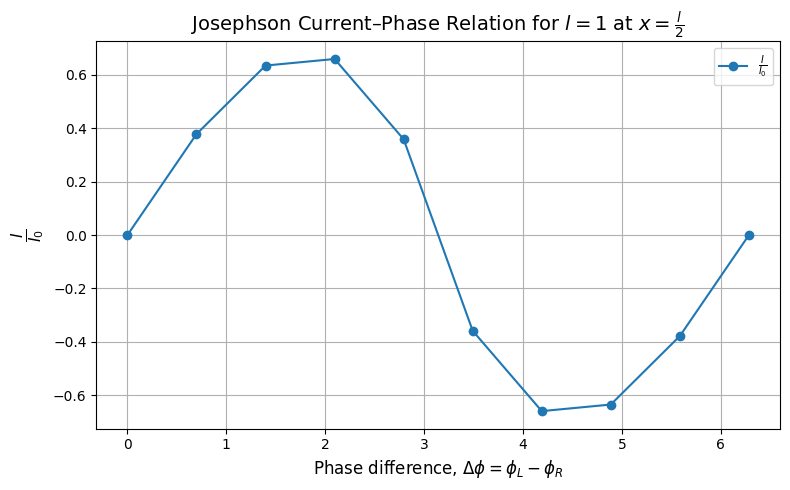

In [59]:
#Plotting

plt.figure(figsize=(8, 5))
plt.plot(delta_phis, I_over_I0, 'o-', label=r'$\frac{I}{I_0}$')
plt.xlabel(r'Phase difference, $\Delta\phi = \phi_L - \phi_R$', fontsize=12)
plt.ylabel(r'$\frac{I}{I_0}$', fontsize=16)
plt.title(r'Josephson Current–Phase Relation for $l=1$ at $x=\frac{l}{2}$', fontsize=14)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


We can see that the current–phase relation is sinusoidal-like and it should be $2\pi$-periodic. $I/I_{0}$ starts at 0 when $\Delta\varphi=0$, rises to a maximum near $\Delta\varphi=\pi/2$, then decreases to 0 at $\Delta\varphi=\pi$. For $\Delta\varphi$ between $\pi$ and $2\pi$, the current becomes negative, so the flow reverse direction, reaching a minimum $\Delta\varphi\approx3\pi/2$ and returns to zero at $\Delta\varphi=2\pi$.

The reason for this current is because a phase difference corresponds to a gradient in the superconducting order parameter across the junction, driving Cooper pairs through the normal region. The current reaches a maximum at intermediate phase (roughly $\pi/2$), indicating the point of largest energy transfer, and then diminishes at $\Delta\varphi=\pi$ where the two superconductors are $\pi$ radians out of phase but the net current returns to zero. For $\Delta\varphi$ beyond $\pi$, the current reverses direction, which side has the “leading” phase flips, so the supercurrent flows the opposite way. By $\Delta\varphi=2\pi$, the phase difference corresponds to a full $2\pi$ twist, which is physically equivalent to no difference at all, so $I$ comes back to zero and the cycle would repeat.